In [1]:
import cv2 
import matplotlib.pyplot as plt
import imutils
import numpy as np
#plt.style.use('seaborn-white')
%matplotlib inline

In [2]:
img = cv2.imread("phone.jpg")

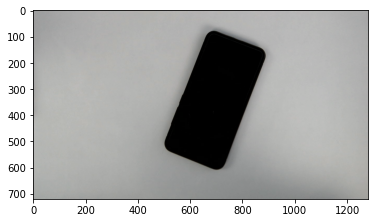

In [3]:
plt.imshow(img)

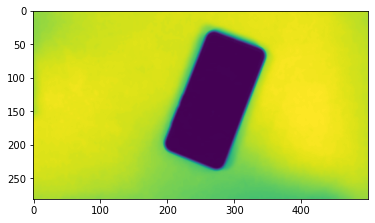

In [4]:
# Resize and convert the image to grayscale and remove Gaussian noise
img = imutils.resize(img , width = 500)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)
plt.imshow(gray)

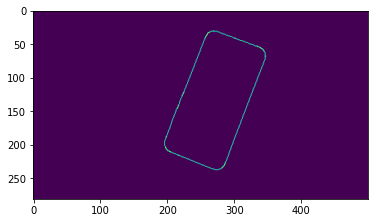

In [5]:
# perform edge detection by first dilating and then erosion to
# join broken boundaries of object edges
edged = cv2.Canny(gray, 50, 100)
edged = cv2.dilate(edged, None, iterations=1)
edged = cv2.erode(edged, None, iterations=1)
plt.imshow(edged)

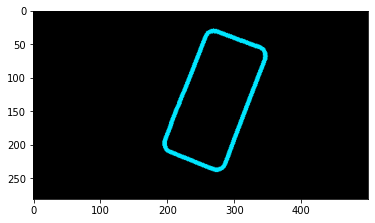

In [6]:
# find contours in the edge map
cnts_ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts_)
im = np.expand_dims(edged, axis=2).repeat(3, axis=2) 
for k, _ in enumerate(cnts):
    im = cv2.drawContours(im, cnts, k, (0, 230, 255), 6)
plt.imshow(im)


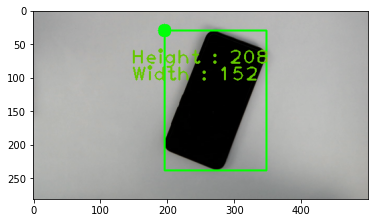

In [7]:
img_ = img.copy()
for cnt in cnts_[0]:
    # Get rect
    x,y,w,h = cv2.boundingRect(cnt)
    im_STRAIGHT = cv2.rectangle(img_,(x,y),(x+w,y+h),(0,255,0),2)
    im_STRAIGHT = cv2.circle(img_, (int(x) ,int(y)) , 10, (0,255,9), -1)
    im_STRAIGHT = cv2.putText(img_ , f'Height : {h}' ,(int(x)-50 ,int(y)+50), cv2.FONT_HERSHEY_PLAIN, 2, (100, 200, 0), 2 )
    im_STRAIGHT = cv2.putText(img_ , f'Width : {w}' ,(int(x)-50 ,int(y)+75), cv2.FONT_HERSHEY_PLAIN, 2, (100, 200, 0), 2 )
plt.imshow(im_STRAIGHT)

The center for the obeject x: 270.8501892089844 y: 133.045654296875 and Height: 194.91464233398438 , width: 97.60841369628906


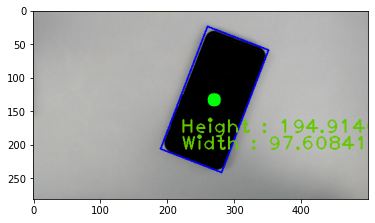

In [8]:
img__= img.copy()
for cnt in cnts_[0]:
    # Get rect
    rect = cv2.minAreaRect(cnt)
    (x, y), (w, h), angle = rect
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    print(f"The center for the obeject x: {x} y: {y} and Height: {h} , width: {w}")
    im_ROTATED = cv2.circle(img__, (int(x) ,int(y)) , 10, (0,255,9), -1)
    im_ROTATED = cv2.drawContours(img__,[box],0,(0,0,255),2)
    im_ROTATED = cv2.putText(img__ , f'Height : {h}' ,(int(x)-50 ,int(y)+50), cv2.FONT_HERSHEY_PLAIN, 2, (100, 200, 0), 2 )
    im_ROTATED = cv2.putText(img__, f'Width : {w}' ,(int(x)-50 ,int(y)+75), cv2.FONT_HERSHEY_PLAIN, 2, (100, 200, 0), 2 )
plt.imshow(im_ROTATED)

#  Finding the Aruco marker

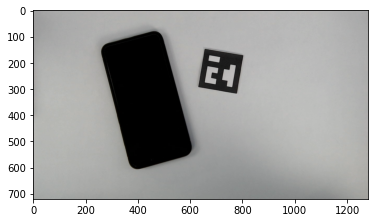

In [9]:
img2 = cv2.imread("phone_aruco_marker.jpg")
plt.imshow(img2)

In [10]:
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_5X5_50)
parameters = cv2.aruco.DetectorParameters()
print(parameters,aruco_dict)

< cv2.aruco.DetectorParameters 000001E370A78FA0> < cv2.aruco.Dictionary 000001E370A5FC30>


In [11]:
corners, _, _ = cv2.aruco.detectMarkers(img2, aruco_dict, parameters=parameters)
# Draw polygon around the marker
int_conrners =np.int0(corners)
int_conrners

array([[[[777, 318],
         [632, 293],
         [656, 148],
         [803, 173]]]], dtype=int64)

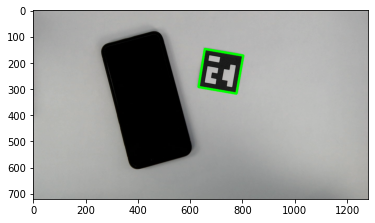

In [12]:
# plt.imshow(cv2.polylines(img2, int_conrners, True, (0, 255, 0), 7))

In [18]:
# Aruco Perimeter
aruco_perimeter = cv2.arcLength(corners[0], True)
print(f'The perimeter of the marker is = {aruco_perimeter}')

The perimeter of the marker is = 590.5354766845703


In [16]:
# Pixel to cm ratio
pixel_cm_ratio = aruco_perimeter / 20
#we are dividing the peri by 20 beacause each side on the marker is of 5cm ,i.e. 20cm
print(pixel_cm_ratio)

29.526773834228514
